In [2]:
import matplotlib.pyplot as plt
import argparse
import time
import numpy as np
import mne
import samplerate
import os
from scipy import signal

import spkit as sp


#from brainflow #import BrainFlow

from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets

In [4]:
import pandas as pd
from scipy import signal
import numpy as np

def estimate_snr(signal, fs, signal_band=(1,20), noise_band=(0.5, 40)):
    f, Pxx = welch(signal, fs, nperseg=fs*2)
    signal_power = np.sum(Pxx[(f >= signal_band[0]) & (f <= signal_band[1])])
    total_power = np.sum(Pxx[(f >= noise_band[0]) & (f <= noise_band[1])])
    noise_power = total_power - signal_power
    return 10 * np.log10(signal_power / (noise_power + 1e-10))



def filtering(data, samp_freq):
    notch_freq = 50.0
    quality_factor = 30.0 


    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)

    
    sos = signal.butter(3, [1, 45], btype='bandpass', fs=samp_freq, output='sos')


    data_filtered = np.copy(data)


    for ii in range(data.shape[0]):
     
        data_filtered[ii, :] = signal.filtfilt(b_notch, a_notch, data_filtered[ii, :])
      
        data_filtered[ii, :] = signal.sosfilt(sos, data_filtered[ii, :])

    return data_filtered


def plot_fft(data, fs, canal=0):
    from scipy.fft import fft, fftfreq

    señal = data[canal]
    n = len(señal)
    freqs = fftfreq(n, d=1/fs)
    magnitud = np.abs(fft(señal))[:n//2]
    freqs = freqs[:n//2]

    plt.figure(figsize=(10, 4))
    plt.plot(freqs, magnitud, color='darkgreen')
    plt.title(f'psd - channel {canal}')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 60)  # para ver hasta 60 Hz
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
/Users/laura/Documents/MUSE/HOLS/13mai-cable28AWG-sitting.csv
/Users/laura/Documents/MUSE/HOLS/13mai-cable28AWG-moving.csv
/Users/laura/Documents/MUSE/HOLS/13mai-cable28AWG-dribnking.csv
/Users/laura/Documents/MUSE/HOLS/13mai-cable28AWG-chewing.csv

In [78]:
data2=pd.read_csv('/Users/laura/Documents/MUSE/HOLS/13mai-cable28AWG-sitting.csv',delimiter=',',header=None)
#/Users/laura/Documents/MUSE/HOLS/18April-trialactiveflat.csv

In [80]:
samp_freq = 250 
data_filtered = filtering(data2, samp_freq) 
n_samples_to_cut = 5 * samp_freq

data_filtered_cut = data_filtered[:, n_samples_to_cut:]
#times_cut = times[n_samples_to_cut:]
XR_M = sp.eeg.ATAR(data_filtered_cut.copy(),wv='db4', winsize=5*250 , beta=0.1,thr_method=None,theta_a=20,OptMode='elim', verbose=0)

/opt/anaconda3/lib/python3.12/site-packages/spkit/eeg/atar_algorithm.py:507: UserWarning: Make sure the upper and lower bound values (k1,k2) are of same order as signal amplitude. If amplitude of signal is much lower than k2 or even k1, ATAR algorithm will have no affect on signal. For example, k2=100, and/or k1=10 is setting for amplitude in micro-volt (in order of 100s). If provided signal is in volt (1e-6), multiply signal with 1e6 (X*1e6) and then apply ATAR
/opt/anaconda3/lib/python3.12/site-packages/spkit/eeg/atar_algorithm.py:510: UserWarning: Upper bound k2 is set to very high. ATAR might have no impact of signal. Either change amplitude unit of signal by multiplying 1e3, or 1e6, or lower the value of k2 and respectively, k1.  One of the straightforward way to set k2 is k2 = np.std(X).


In [7]:
fp2=XR_M[2,:]
fp1=XR_M[1, :]
#af7=XR_M[1,:]
#af8=XR_M[3,:]
samp_freq = 250  # Hz
n_samples = XR_M.shape[1]
times = np.arange(n_samples) / samp_freq

'\nplt.subplot(4, 1, 3)\nplt.plot(times, af7, label="AF7", color=\'green\')\nplt.title("AF7")\nplt.xlabel("Time (s)")\nplt.ylabel("Amplitude (µV)")\nplt.ylim(-200, 200)\nplt.grid(True)\n\n\nplt.subplot(4, 1, 4)\nplt.plot(times, af8, label="AF8", color=\'purple\')\nplt.title("AF8")\nplt.xlabel("Time (s)")\nplt.ylabel("Amplitude (µV)")\nplt.ylim(-200, 200)\nplt.grid(True)\n\nplt.tight_layout()\nplt.show()\n'

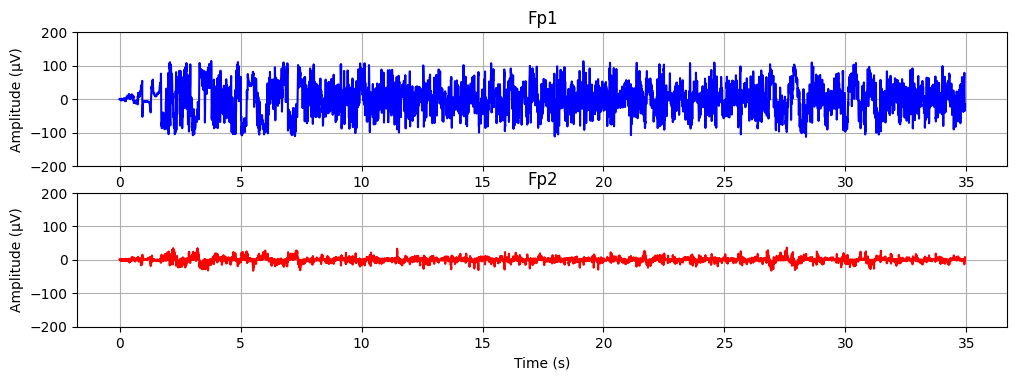

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
plt.plot(times, fp1, label="Fp1", color='blue')
plt.title("Fp1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)


plt.subplot(4, 1, 2)
plt.plot(times, fp2, label="Fp2", color='red')
plt.title("Fp2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)

'''
plt.subplot(4, 1, 3)
plt.plot(times, af7, label="AF7", color='green')
plt.title("AF7")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)


plt.subplot(4, 1, 4)
plt.plot(times, af8, label="AF8", color='purple')
plt.title("AF8")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)

plt.tight_layout()
plt.show()
'''

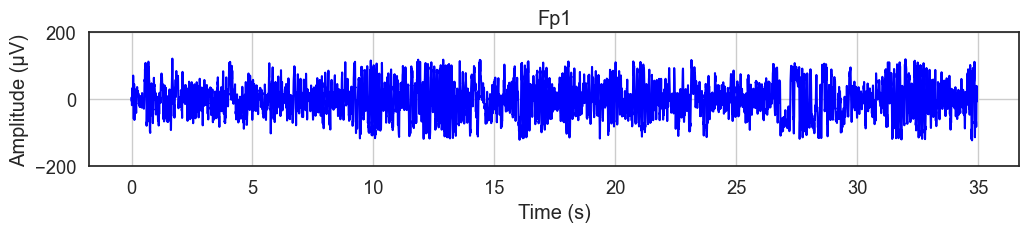

In [82]:
f=XR_M[3,:]

samp_freq = 250  # Hz
n_samples = XR_M.shape[1]
times = np.arange(n_samples) / samp_freq

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
plt.plot(times, f, label="Fp1", color='blue')
plt.title("Fp1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)

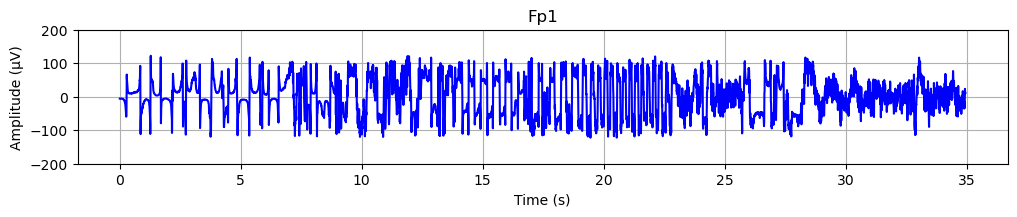

In [30]:
f=XR_M[3,:]

samp_freq = 250  # Hz
n_samples = XR_M.shape[1]
times = np.arange(n_samples) / samp_freq

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
plt.plot(times, f, label="Fp1", color='blue')
plt.title("Fp1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)

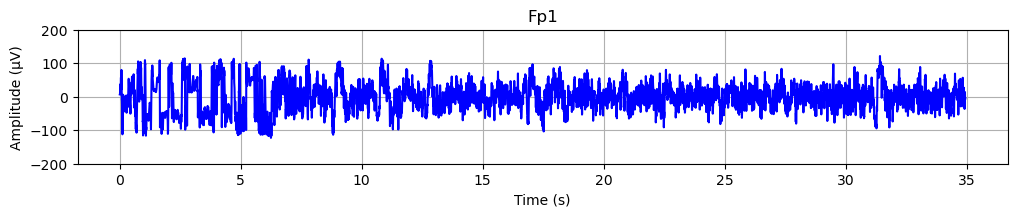

In [46]:
f=XR_M[3,:]

samp_freq = 250  # Hz
n_samples = XR_M.shape[1]
times = np.arange(n_samples) / samp_freq

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
plt.plot(times, f, label="Fp1", color='blue')
plt.title("Fp1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.ylim(-200, 200)
plt.grid(True)

In [48]:
#Checking
def basic_stats(signal):
    return {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'rms': np.sqrt(np.mean(signal**2)),
        'peak_to_peak': np.ptp(signal)
    }

stats_f = basic_stats(f)
#stats_fp2 = basic_stats(fp2)
#stats_af7 = basic_stats(af7)
#stats_af8 = basic_stats(af8)
print(stats_f)
#print(stats_fp2)
#print(stats_af7)
#print(stats_af8)

{'mean': -0.2350429938908875, 'std': 39.46407583980703, 'rms': 39.46477577662158, 'peak_to_peak': 244.44848907625766}


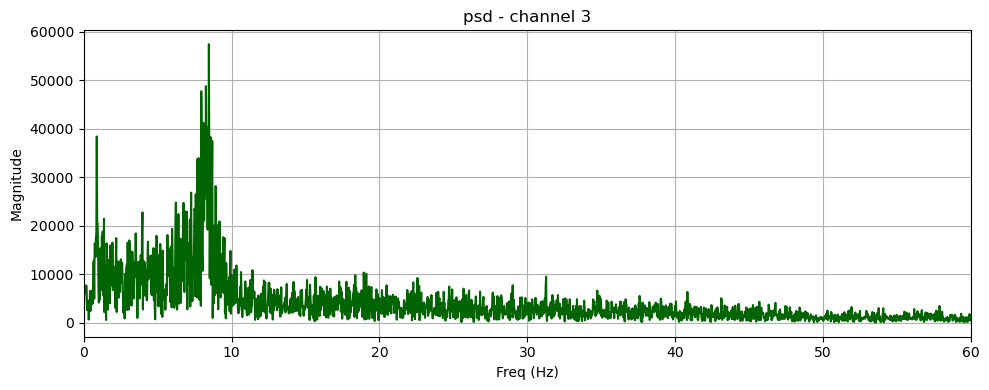

In [15]:
fs=250
plot_fft(XR_M, fs, canal=3)

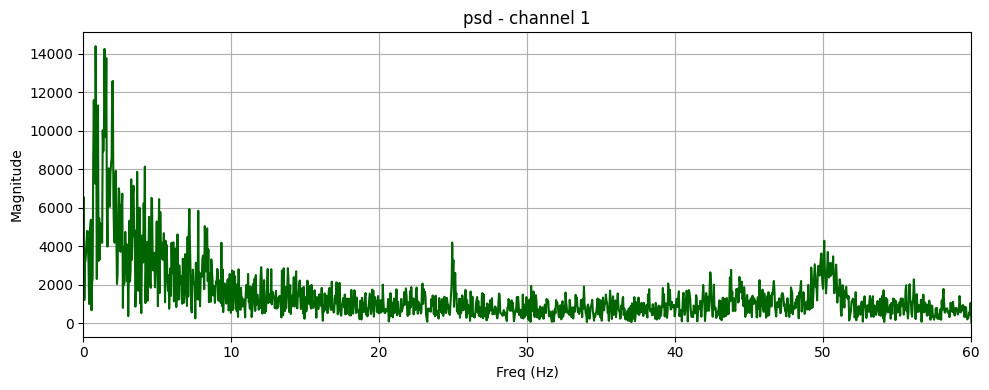

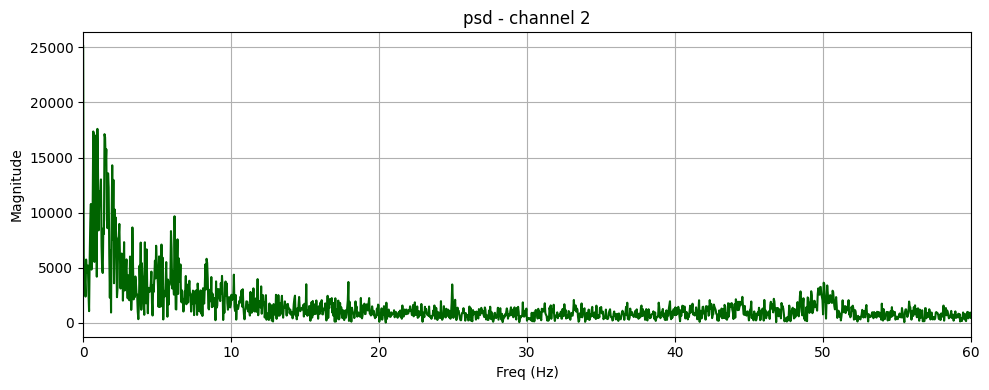

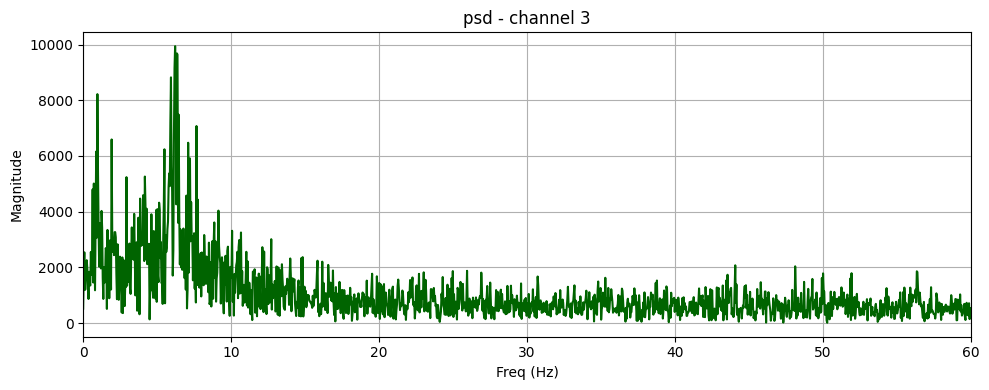

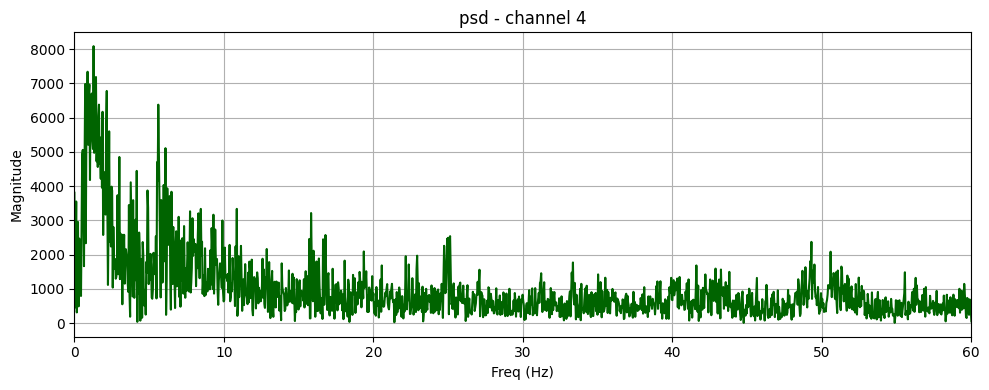

In [10]:
fs=250
plot_fft(XR_M, fs, canal=1)
plot_fft(XR_M, fs, canal=2)  
plot_fft(XR_M, fs, canal=3)  
plot_fft(XR_M, fs, canal=4)  

# IT MAKES SENSE!!

In [14]:
def plot_fft(data, fs, canal=0, show_db=False, show_bands=True):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.fft import fft, fftfreq

    señal = data[canal]
    n = len(señal)
    freqs = fftfreq(n, d=1/fs)
    fft_vals = fft(señal)
    power = (np.abs(fft_vals[:n // 2]) ** 2) / n
    freqs = freqs[:n // 2]

    if show_db:
        power = 10 * np.log10(power + 1e-12)
        ylabel = ' (dB)'
    else:
        ylabel = '(uV²)'

    plt.figure(figsize=(10, 4))
    plt.plot(freqs, power, color='black', linewidth=1.0)
    plt.title(f'freq {canal}')
    plt.xlabel('Freq (Hz)')
    plt.ylabel(ylabel)
    plt.xlim(0, 60)
    plt.grid(True)

    if show_bands:
        bands = {
            'Delta (0.5–4 Hz)': ((0.5, 4), 'blue'),
            'Theta (4–8 Hz)': ((4, 8), 'cyan'),
            'Alpha (8–13 Hz)': ((8, 13), 'green'),
            'Beta (13–30 Hz)': ((13, 30), 'orange'),
            'Gamma (30–50 Hz)': ((30, 50), 'red')
        }
        for label, ((fmin, fmax), color) in bands.items():
            plt.axvspan(fmin, fmax, color=color, alpha=0.15, label=label)

        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


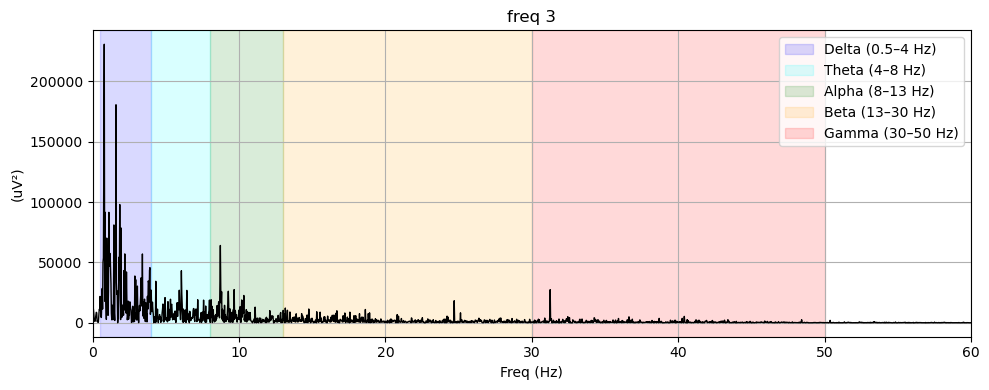

In [50]:
fs=250
plot_fft(XR_M, fs,canal=3)
#plot_fft(XR_M, fs,canal=2)  
#plot_fft(XR_M, fs,canal=3)  
#plot_fft(XR_M, fs,canal=4)  

In [18]:
import numpy as np

def eeg_quality_metrics(signal, fs):
    """
    Evalúa métricas básicas de calidad de una señal EEG.

    Parámetros:
    - signal: señal EEG (1D array)
    - fs: frecuencia de muestreo en Hz

    Retorna:
    - Diccionario con métricas de calidad
    """

    duration = len(signal) / fs

    # 1. Varianza
    variance = np.var(signal)

    # 2. Número de cruces por cero
    zero_crossings = ((signal[:-1] * signal[1:]) < 0).sum()
    zero_crossings_rate = zero_crossings / duration  # por segundo

    # 3. Flatline detection (número de muestras sin cambio)
    flat_threshold = 1e-6
    flat_samples = np.sum(np.abs(np.diff(signal)) < flat_threshold)
    flatline_ratio = flat_samples / len(signal)

    # 4. Detección de saltos (artefactos grandes)
    jump_threshold = 5 * np.std(signal)
    large_jumps = np.sum(np.abs(np.diff(signal)) > jump_threshold)

    # 5. Rango de la señal
    signal_range = np.max(signal) - np.min(signal)

    return {
        'variance': variance,
        'zerocrossings': zero_crossings_rate,
        'percentage_flatline': flatline_ratio * 100,
        'large jumps': large_jumps,
        'range': signal_range
    }


In [20]:
import numpy as np
from scipy.signal import welch

def eeg_quality_metrics(signal, fs, ref_channel=None):
    """
    Evaluates basic quality metrics of an EEG signal.

    Parameters:
    - signal: EEG signal (1D array)
    - fs: sampling frequency in Hz
    - ref_channel: second channel to check left-right symmetry (optional)

    Returns:
    - Dictionary with quality metrics
    """

    duration = len(signal) / fs

    # Power Spectral Density using Welch method
    f, Pxx = welch(signal, fs, nperseg=fs*2)

    # 1. Alpha band power (8–12 Hz)
    alpha_power = np.sum(Pxx[(f >= 8) & (f <= 12)])
    delta_power = np.sum(Pxx[(f >= 0.5) & (f <= 4)])
    beta_power = np.sum(Pxx[(f >= 13) & (f <= 30)])

    # 2. Power at power line frequency (e.g., 50 Hz)
    noise_freq = 50
    noise_power = np.sum(Pxx[(f >= noise_freq - 1) & (f <= noise_freq + 1)])

    # 3. Zero crossings
    zero_crossings = ((signal[:-1] * signal[1:]) < 0).sum()
    zero_crossings_rate = zero_crossings / duration  # per second

    # 4. Flatline detection
    flat_threshold = 1e-6
    flat_samples = np.sum(np.abs(np.diff(signal)) < flat_threshold)
    flatline_ratio = flat_samples / len(signal)

    # 5. Large jump artifacts
    jump_threshold = 5 * np.std(signal)
    large_jumps = np.sum(np.abs(np.diff(signal)) > jump_threshold)

    # 6. Signal range
    signal_range = np.max(signal) - np.min(signal)

    # 7. Left-right symmetry
    symmetry_corr = None
    if ref_channel is not None:
        min_len = min(len(signal), len(ref_channel))
        symmetry_corr = np.corrcoef(signal[:min_len], ref_channel[:min_len])[0,1]

    return {
        'alpha_power': alpha_power,
        'beta_power': beta_power,
        'delta_power': delta_power,
        'line_noise_power': noise_power,
        'zero_crossings_per_sec': zero_crossings_rate,
        'percentage_flatline': flatline_ratio * 100,
        'large_jumps': large_jumps,
        'range_uV': signal_range,
        'symmetry_corr_LR': symmetry_corr
    }



In [52]:
fp1=eeg_quality_metrics(XR_M[3,:], 250)
fp2=eeg_quality_metrics(XR_M[4,:], 250)

In [54]:
fp1

{'alpha_power': 464.2191858045139,
 'beta_power': 467.21933156011715,
 'delta_power': 1578.9527451774752,
 'line_noise_power': 6.375518627005162,
 'zero_crossings_per_sec': 30.48082427017745,
 'percentage_flatline': 0.0,
 'large_jumps': 0,
 'range_uV': 244.44848907625766,
 'symmetry_corr_LR': None}

In [40]:
fp2


{'alpha_power': np.float64(1.253212552795779),
 'beta_power': np.float64(2.3640622853397772),
 'delta_power': np.float64(3.1307336993584487),
 'line_noise_power': np.float64(0.0996101546172402),
 'zero_crossings_per_sec': np.float64(37.81650174621653),
 'percentage_flatline': np.float64(0.0),
 'large_jumps': np.int64(11),
 'range_uV': np.float64(31.55645897067044),
 'symmetry_corr_LR': None}

In [56]:
from scipy.signal import welch

def estimate_snr(signal, fs, signal_band=(1,30), noise_band=(0.5, 40)):
    f, Pxx = welch(signal, fs, nperseg=fs*2)
    signal_power = np.sum(Pxx[(f >= signal_band[0]) & (f <= signal_band[1])])
    total_power = np.sum(Pxx[(f >= noise_band[0]) & (f <= noise_band[1])])
    noise_power = total_power - signal_power
    return 10 * np.log10(signal_power / (noise_power + 1e-10))

snr_fp1 = estimate_snr(fp1, fs)


print(snr_fp1)
snr_fp2 = estimate_snr(fp2, fs)


print(snr_fp2)
snr_af7 = estimate_snr(af7, fs)


print(snr_af7)
snr_af8 = estimate_snr(af8, fs)


print(snr_af8)

8.917706614304864
7.713210106233613
9.740692573381175
7.4337691992782995


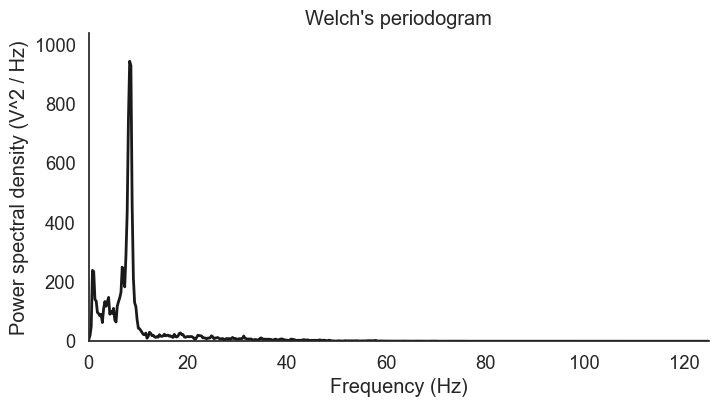

In [84]:
from scipy import signal
import seaborn as sns
fs=250
data=XR_M[3,:]
# Define window length (4 seconds)
win = 4 * fs
freqs, psd = signal.welch(data, fs, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

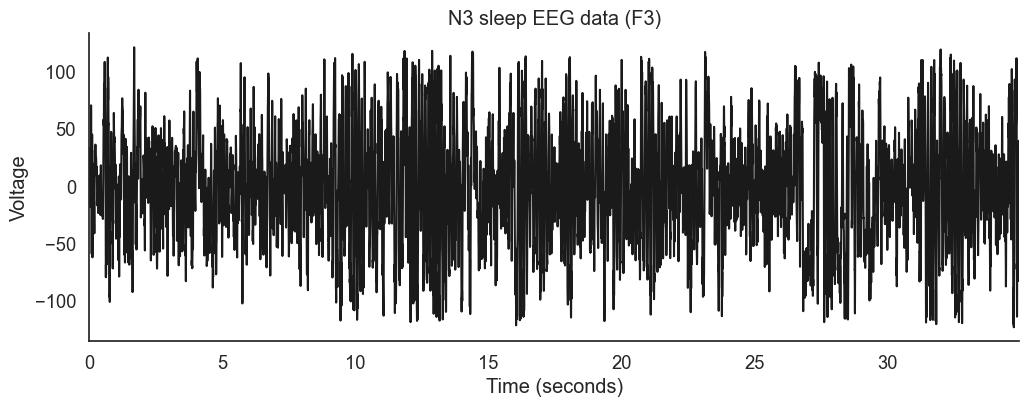

In [86]:
time = np.arange(data.size) / fs

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()

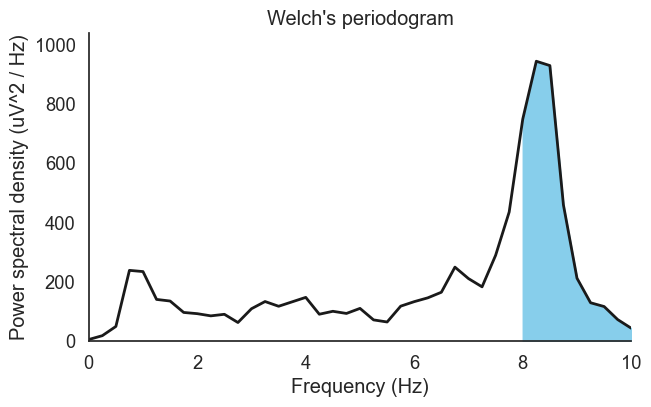

In [88]:

low, high = 8, 13

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [90]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
alpha_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % alpha_power)

Absolute delta power: 889.363 uV^2


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_64109/832166662.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0


In [92]:
total_power = simps(psd, dx=freq_res)
alpha_rel_power = alpha_power / total_power
print('Relative alpha power: %.3f' % alpha_rel_power)

Relative alpha power: 0.366


/var/folders/1m/2gsg5r5x3_xb8rgnzdgz8_t00000gn/T/ipykernel_64109/2446578583.py:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0


In [76]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp
